In [69]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from matplotlib import pyplot as plt   
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import accuracy_score, classification_report    
from sklearn.metrics import accuracy_score, confusion_matrix

In [70]:
titanic_test=pd.read_scsv("tit_test.csv")

titanic_train=pd.read_csv("tit_train.csv")

In [71]:
titanic_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [72]:
titanic_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [73]:
titanic_test.shape

(418, 11)

In [74]:
titanic_train.shape

(891, 12)

In [75]:
titanic_test.size

4598

In [76]:
titanic_train.size

10692

In [77]:
titanic_test.count()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

In [78]:
titanic_train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [79]:
missing_values=titanic_test.isnull().sum()

In [80]:
missing_values

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [81]:
missing_values=titanic_train.isnull().sum()

In [82]:
missing_values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

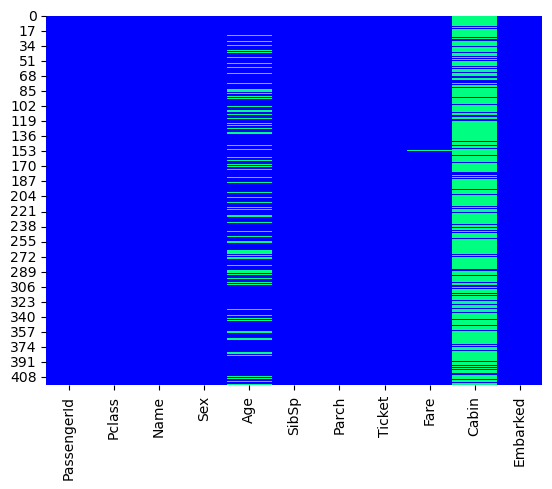

In [83]:
sns.heatmap(titanic_test.isnull(),cmap='winter',cbar=False)
plt.show()

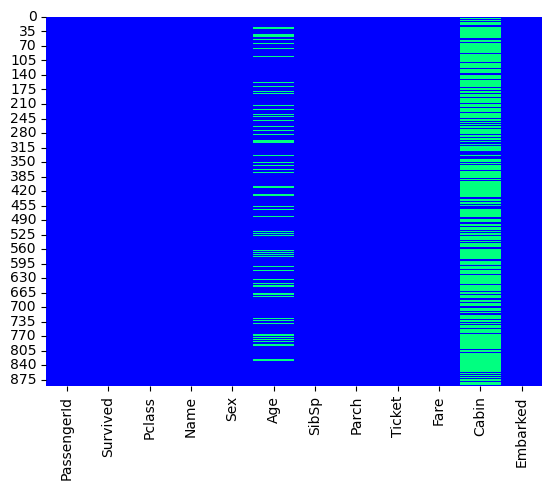

In [84]:
sns.heatmap(titanic_train.isnull(),cmap='winter',cbar=False)
plt.show()

In [85]:
numerical_columns = titanic_train.select_dtypes(include=['int64', 'float64']).columns 
titanic_train[numerical_columns] = titanic_train[numerical_columns].fillna(titanic_train[numerical_columns].mean())


In [86]:
categorical_columns = titanic_train.select_dtypes(include='object').columns 
titanic_train[categorical_columns] = titanic_train[categorical_columns].fillna('Unknown')

In [87]:
print(titanic_train.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [88]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [89]:
plt.figure(figsize=(6, 4))

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

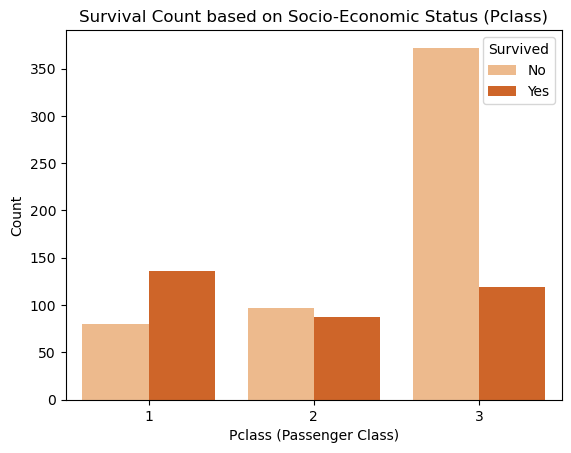

In [90]:
sns.countplot(x='Pclass', hue='Survived', data=titanic_train, palette='Oranges')
plt.title('Survival Count based on Socio-Economic Status (Pclass)') 
plt.xlabel('Pclass (Passenger Class)') 
plt.ylabel('Count') 
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes']) 
plt.show()

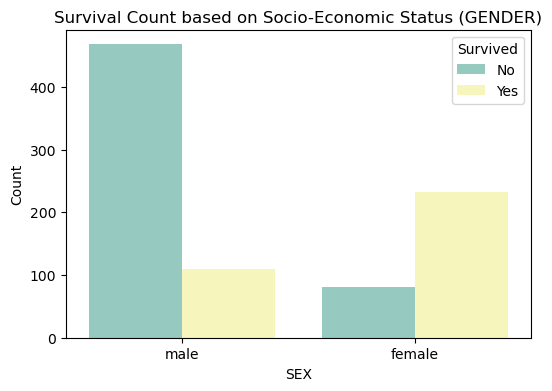

In [91]:
plt.figure(figsize=(6, 4)) 
sns.countplot(x='Sex', hue='Survived', data=titanic_train, palette='Set3') 
plt.title('Survival Count based on Socio-Economic Status (GENDER)') 
plt.xlabel('SEX') 
plt.ylabel('Count') 
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes']) 
plt.show()

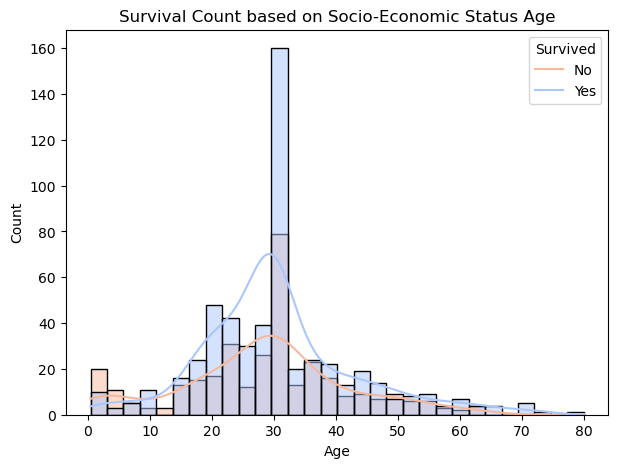

In [92]:
plt.figure(figsize=(7, 5)) 
sns.histplot(x='Age', hue='Survived', data=titanic_train, kde=True, palette='coolwarm') 
plt.title('Survival Count based on Socio-Economic Status Age') 
plt.xlabel('Age') 
plt.ylabel('Count') 
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes']) 
plt.show()

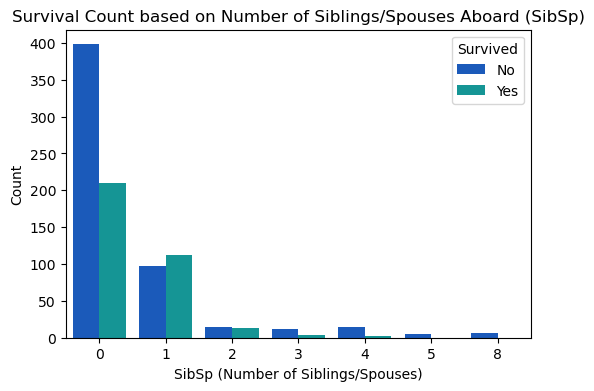

In [93]:
plt.figure(figsize=(6, 4)) 
sns.countplot(x='SibSp', hue='Survived', data=titanic_train, palette='winter') 
plt.title('Survival Count based on Number of Siblings/Spouses Aboard (SibSp)') 
plt.xlabel('SibSp (Number of Siblings/Spouses)') 
plt.ylabel('Count') 
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes']) 
plt.show()

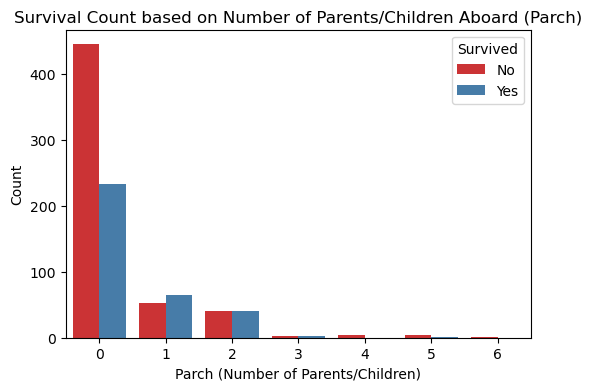

In [94]:
plt.figure(figsize=(6, 4)) 
sns.countplot(x='Parch', hue='Survived', data=titanic_train, palette='Set1') 
plt.title('Survival Count based on Number of Parents/Children Aboard (Parch)') 
plt.xlabel('Parch (Number of Parents/Children)') 
plt.ylabel('Count') 
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

In [95]:
titanic_train.head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22.0,38.0,26.0,35.0,35.0
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


In [96]:
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Fare', 'Embarked'] 
trn_df1 = titanic_train.drop(columns=columns_to_drop)

In [97]:
trn_df1

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.000000,1,0
1,1,1,female,38.000000,1,0
2,1,3,female,26.000000,0,0
3,1,1,female,35.000000,1,0
4,0,3,male,35.000000,0,0
...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0
887,1,1,female,19.000000,0,0
888,0,3,female,29.699118,1,2
889,1,1,male,26.000000,0,0


In [98]:
label_encoder = LabelEncoder() 
trn_df1['Sex'] = label_encoder.fit_transform(trn_df1['Sex'])

In [99]:
X = trn_df1.drop('Survived', axis=1) 
y = trn_df1['Survived']

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
model = DecisionTreeClassifier() 
model.fit(X_train, y_train) 
DecisionTreeClassifier()

DecisionTreeClassifier()

In [105]:
y_pred = model.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred) 
print("Accuracy:", accuracy)

Accuracy: 0.7653631284916201


In [107]:
titanic_test=pd.read_csv("tit_test.csv")

In [108]:
titanic_test.head(2).T

,0,1
PassengerId,892,893
Pclass,3,3
Name,"Kelly, Mr. James","Wilkes, Mrs. James (Ellen Needs)"
Sex,male,female
Age,34.5,47.0
SibSp,0,1
Parch,0,0
Ticket,330911,363272
Fare,7.8292,7.0
Cabin,NaN,NaN


In [109]:
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Fare', 'Embarked']
test_df1 = titanic_test.drop(columns=columns_to_drop)

In [110]:
test_df1

,Pclass,Sex,Age,SibSp,Parch
0,3,male,34.5,0,0
1,3,female,47.0,1,0
2,2,male,62.0,0,0
3,3,male,27.0,0,0
4,3,female,22.0,1,1
...,...,...,...,...,...
413,3,male,NaN,0,0
414,1,female,39.0,0,0
415,3,male,38.5,0,0
416,3,male,NaN,0,0


In [111]:
label_encoder = LabelEncoder() 
test_df1['Sex'] = label_encoder.fit_transform(test_df1['Sex'])

In [112]:
test_df1.count()

Pclass    418
Sex       418
Age       332
SibSp     418
Parch     418
dtype: int64

In [114]:
missing_values = test_df1.isnull().sum() 
missing_values

Pclass     0
Sex        0
Age       86
SibSp      0
Parch      0
dtype: int64

In [115]:
test_df1['Age'] = test_df1['Age'].fillna(test_df1['Age'].mean())

In [116]:
predictions = model.predict(test_df1)

In [117]:
prediction_data=pd.DataFrame({'PassengerId': pd.read_csv('tit_test.csv')['PassengerId'],'Survived': predictions})
prediction_data.to_csv('tit_prediction_df.csv', index=False)

In [118]:
predict_df = pd.read_csv('tit_prediction_df.csv')

In [119]:
predict_df.head(419)

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [121]:
model = RandomForestClassifier(random_state=42)

In [122]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [125]:
y_pred = model.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred) 
print("Accuracy:", accuracy)

Accuracy: 0.8268156424581006


In [126]:
predict_random= model.predict(test_df1)

In [128]:
prediction_data=pd.DataFrame({'PassengerId': pd.read_csv('tit_test.csv')['PassengerId'],'Survived': predict_random}) 
prediction_data.to_csv('tit_prediction_df.csv', index=False)

In [129]:
predict_random_df = pd.read_csv('tit_prediction_df.csv')

In [130]:
predict_random_df. head(419)

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
